# <center>Project Part-I (Clustering)<center>

<p>Team Name: Mushroom
<p>Student Names: Kyle Tran & Maikayla Brunner
<p>Student W#s: 0714885 &

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [ ]:
! pip install kneed 
! pip install kneed[plot] # To also install plotting functions for quick visualizations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_confusion_matrix

## Read Data

In [ ]:
credit_url = "credit_record.csv"
application_url = "application_record.csv"

#
credit = pd.read_csv(credit_url)
application = pd.read_csv(application_url)
#display(credit.head())
#display(application.head())
print(credit.info())
print(application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557

## Data Quality & Cleaning

### Fixing values
dropping the non-integer values and replacing NA values if need
changing credit status to 0 or 1 ( 1 = bad and 0 = good)


Instruction: Add a comment for each method

In [ ]:
application = application.astype({"CNT_FAM_MEMBERS":'int', "AMT_INCOME_TOTAL":'int'})
application = application.select_dtypes(exclude='object')
application['Age'] = -(application['DAYS_BIRTH'])//365
print(application.info()) 
print(application.isnull().sum())
display(application.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   ID                438557 non-null  int64
 1   CNT_CHILDREN      438557 non-null  int64
 2   AMT_INCOME_TOTAL  438557 non-null  int64
 3   DAYS_BIRTH        438557 non-null  int64
 4   DAYS_EMPLOYED     438557 non-null  int64
 5   FLAG_MOBIL        438557 non-null  int64
 6   FLAG_WORK_PHONE   438557 non-null  int64
 7   FLAG_PHONE        438557 non-null  int64
 8   FLAG_EMAIL        438557 non-null  int64
 9   CNT_FAM_MEMBERS   438557 non-null  int64
 10  Age               438557 non-null  int64
dtypes: int64(11)
memory usage: 36.8 MB
None
ID                  0
CNT_CHILDREN        0
AMT_INCOME_TOTAL    0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
FLAG_WORK_PHONE     0
FLAG_PHONE          0
FLAG_EMAIL          0
CNT_FAM_MEMBERS     0
Age                 0
dtyp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Age
0,5008804,0,427500,-12005,-4542,1,1,0,0,2,32
1,5008805,0,427500,-12005,-4542,1,1,0,0,2,32
2,5008806,0,112500,-21474,-1134,1,0,0,0,2,58
3,5008808,0,270000,-19110,-3051,1,0,1,1,1,52
4,5008809,0,270000,-19110,-3051,1,0,1,1,1,52


In [ ]:
def status(s):
    if s == "C":
        return 0
    elif s == "X":
        return 0
    elif s == '0':
        return 0
    elif s == '1':
        return 0
    elif s == '2':
        return 1
    elif s == '3':
        return 1
    elif s == '4':
        return 1
    elif s == '5':
        return 1

credit['STATUS'] = credit['STATUS'].apply(lambda x:status(x))
print(credit.info())
print(credit.isnull().sum())    
display(credit.head())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB
None
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0


In [ ]:
main_df = pd.merge(application,credit,on='ID')
main_df.to_csv("raw_data_credit.csv",index= False)
#files.download("raw_data_credit.csv")
display(main_df[1:1000])
print(main_df.columns)
print(main_df.size)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Age,MONTHS_BALANCE,STATUS
1,5008804,0,427500,-12005,-4542,1,1,0,0,2,32,-1,0
2,5008804,0,427500,-12005,-4542,1,1,0,0,2,32,-2,0
3,5008804,0,427500,-12005,-4542,1,1,0,0,2,32,-3,0
4,5008804,0,427500,-12005,-4542,1,1,0,0,2,32,-4,0
5,5008804,0,427500,-12005,-4542,1,1,0,0,2,32,-5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5008874,2,126000,-12411,-1773,1,0,0,1,4,34,-8,0
996,5008874,2,126000,-12411,-1773,1,0,0,1,4,34,-9,0
997,5008874,2,126000,-12411,-1773,1,0,0,1,4,34,-10,0
998,5008874,2,126000,-12411,-1773,1,0,0,1,4,34,-11,0


Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'Age', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')
10110295


## Visual Exploration of Data

### Histograms

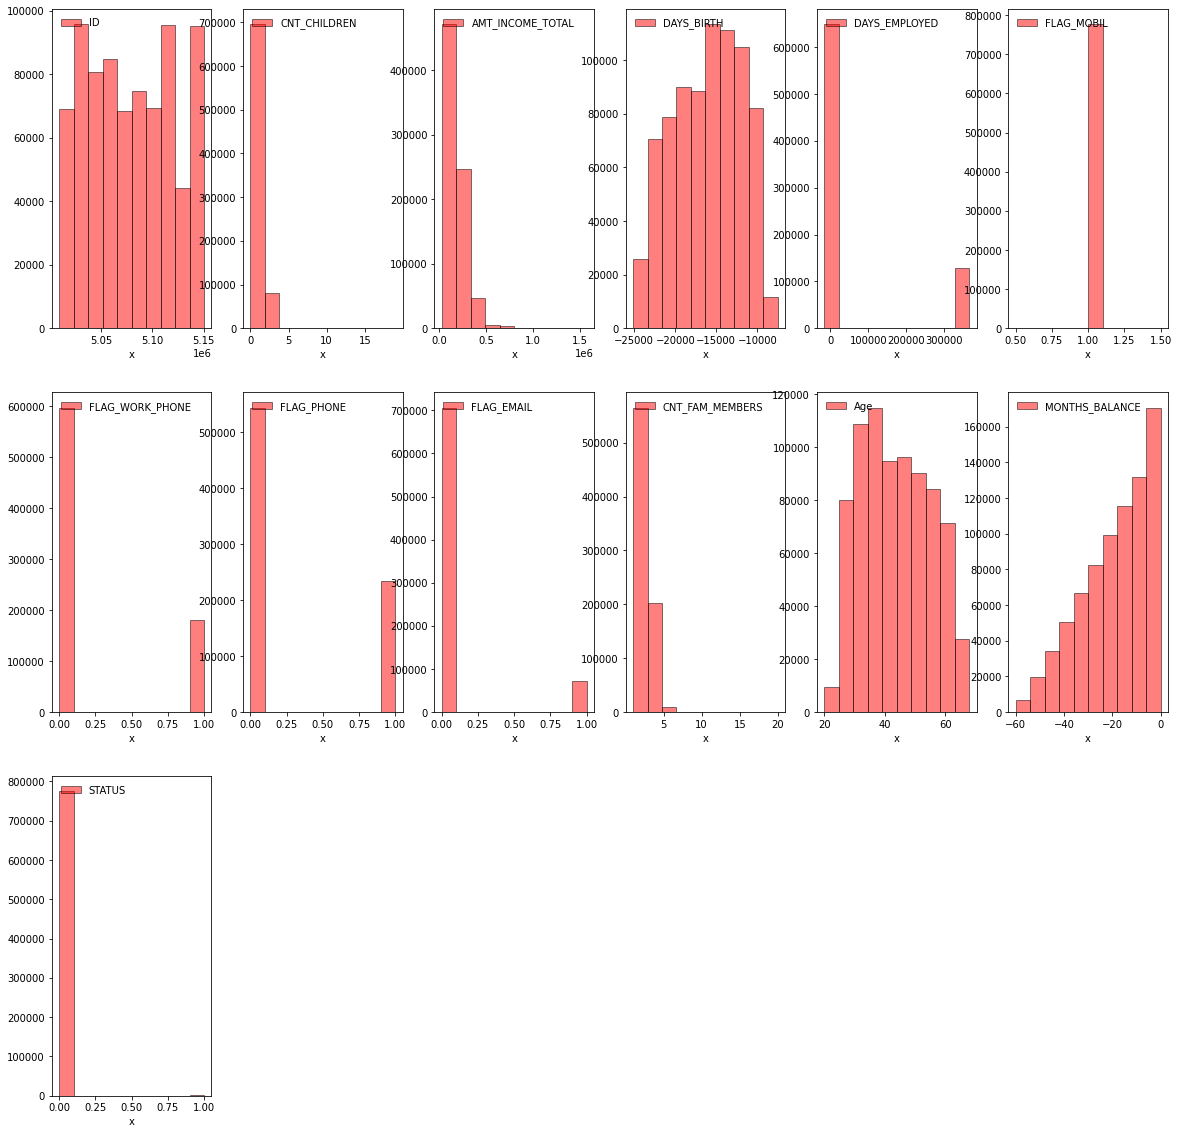

In [ ]:
ncols = 6
nrows = int(np.ceil(len(main_df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(main_df.columns):

            ax.hist(main_df[main_df.columns[counter]], bins=10, color='red', edgecolor='black', alpha=0.5, label='{}'.format(main_df.columns[counter]))
            ax.set_xlabel('x')
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

### Distributions

bar chart on contious data


### Box-Whisker Plots

Text(0.5, 1.0, 'DAYS_EMPLOYED')

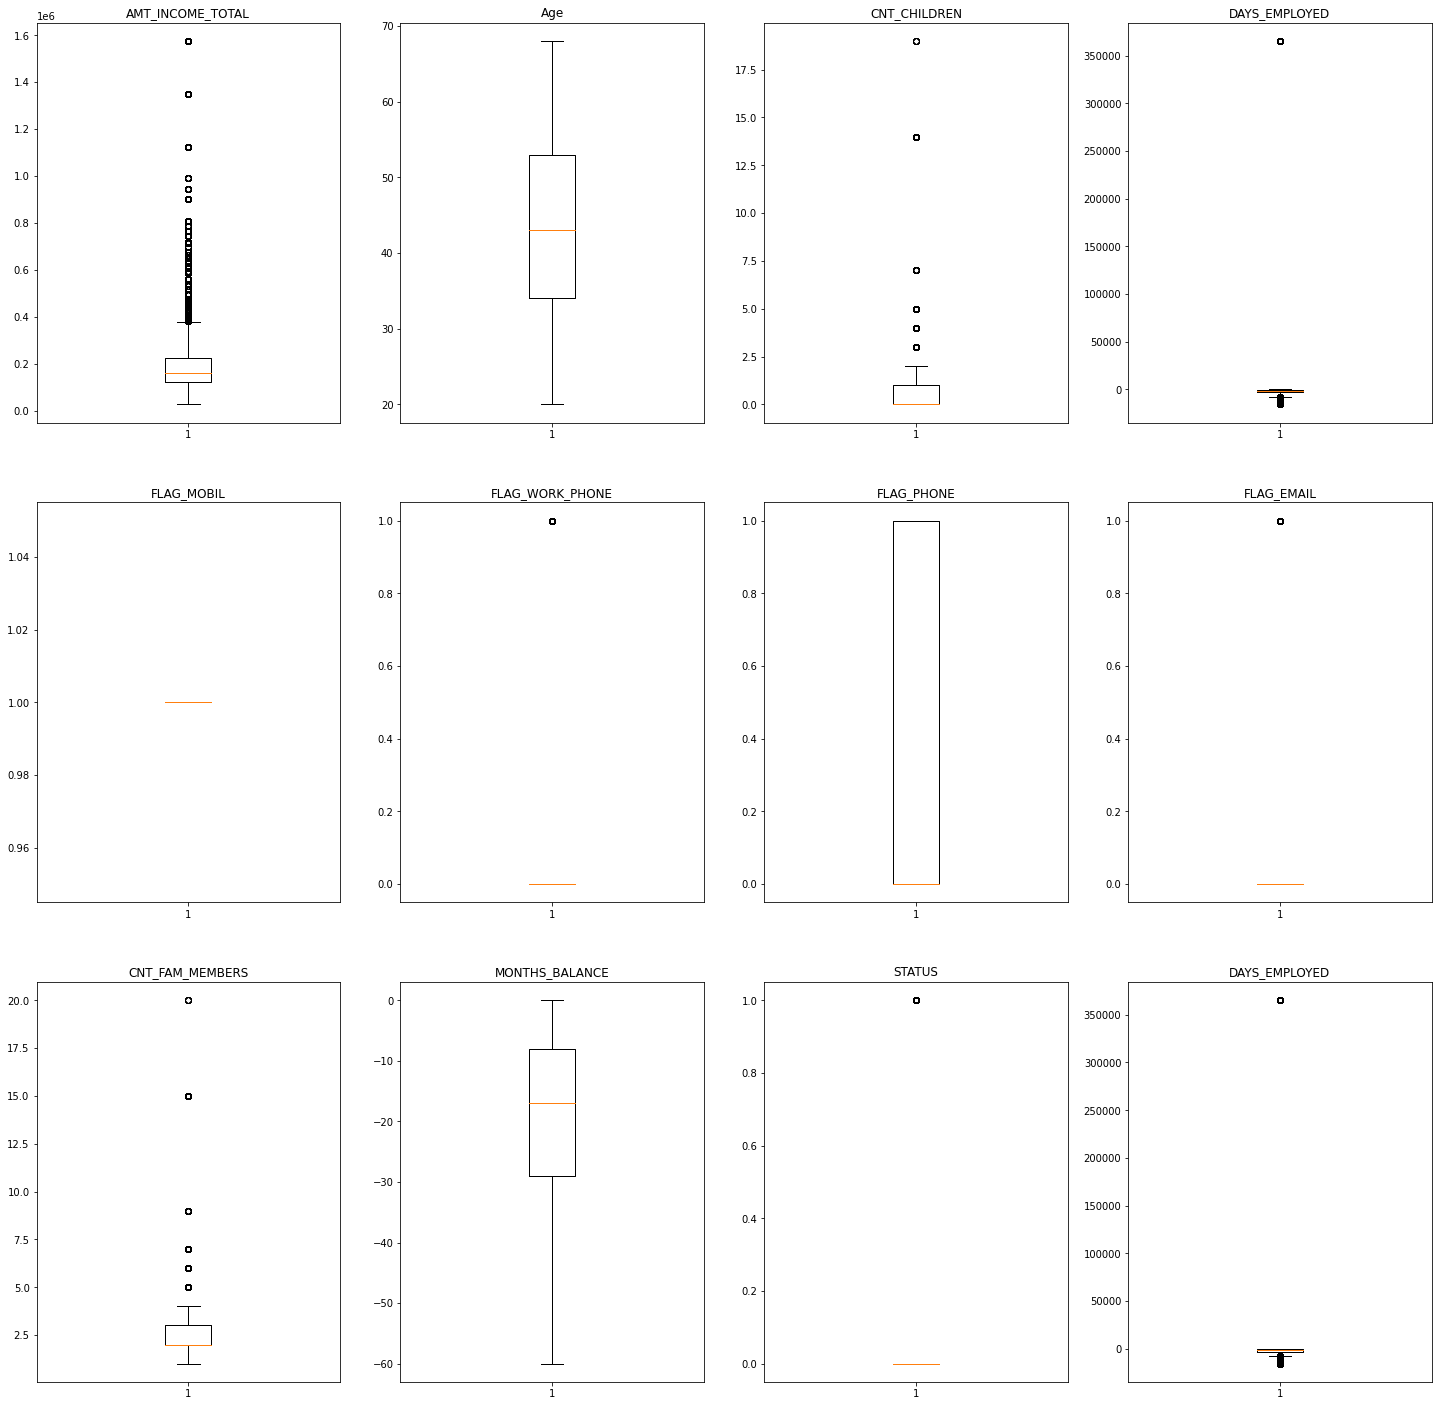

In [ ]:
fig, axs = plt.subplots(3, 4)
fig.set_size_inches(25, 25)
axs[0,0].boxplot(main_df["AMT_INCOME_TOTAL"])
axs[0,0].set_title("AMT_INCOME_TOTAL")

axs[0,1].boxplot(main_df['Age'])
axs[0,1].set_title("Age")

axs[0,2].boxplot(main_df['CNT_CHILDREN'])
axs[0,2].set_title('CNT_CHILDREN')

axs[0,3].boxplot(main_df['DAYS_EMPLOYED'])
axs[0,3].set_title('DAYS_EMPLOYED')

axs[1,0].boxplot(main_df['FLAG_MOBIL'])
axs[1,0].set_title('FLAG_MOBIL')

axs[1,1].boxplot(main_df[ 'FLAG_WORK_PHONE'])
axs[1,1].set_title( 'FLAG_WORK_PHONE')

axs[1,2].boxplot(main_df['FLAG_PHONE'])
axs[1,2].set_title('FLAG_PHONE')

axs[1,3].boxplot(main_df[ 'FLAG_EMAIL'])
axs[1,3].set_title( 'FLAG_EMAIL')

axs[2,0].boxplot(main_df[  'CNT_FAM_MEMBERS'])
axs[2,0].set_title(  'CNT_FAM_MEMBERS')

axs[2,1].boxplot(main_df['MONTHS_BALANCE'])
axs[2,1].set_title('MONTHS_BALANCE')

axs[2,2].boxplot(main_df['STATUS'])
axs[2,2].set_title('STATUS')

axs[2,3].boxplot(main_df['DAYS_EMPLOYED'])
axs[2,3].set_title('DAYS_EMPLOYED')

## Handling Redundancy

### X-square Test

In [ ]:
display(main_df.groupby(["FLAG_PHONE", 'STATUS']).size())
display(main_df.groupby(["FLAG_EMAIL", 'STATUS']).size())
display(main_df.groupby(["FLAG_WORK_PHONE", 'STATUS']).size())
display(main_df.groupby(["FLAG_PHONE", 'FLAG_EMAIL']).size())
display(main_df.groupby(["FLAG_PHONE", 'FLAG_WORK_PHONE']).size())
display(main_df.groupby(["FLAG_EMAIL", 'FLAG_WORK_PHONE']).size())
chart = main_df.groupby(["FLAG_EMAIL", 'FLAG_WORK_PHONE']).size()

FLAG_PHONE_STATUS = [[541828,1822],[233059,1006]]
FLAG_EMAIL_STATUS = [[703808,2610],[71079,218]]
FLAG_WORK_PHONE_STATUS = [[595401,2026],[179486,802]]
FLAG_PHONE_FLAG_EMAIL = [[495036,48614],[211382,22683]]
FLAG_PHONE_FLAG_WORK_PHONE = [[464672,78978],[132755,101310]]
FLAG_EMAIL_FLAG_WORK_PHONE = [[539060,167358],[58367,12930]]
chi_matrix = [FLAG_PHONE_STATUS,FLAG_EMAIL_STATUS,
              FLAG_WORK_PHONE_STATUS,FLAG_PHONE_FLAG_EMAIL,
              FLAG_PHONE_FLAG_WORK_PHONE,FLAG_EMAIL_FLAG_WORK_PHONE]
Name_chi_matrix = ["FLAG_PHONE_STATUS","FLAG_EMAIL_STATUS",
                  "FLAG_WORK_PHONE_STATUS","FLAG_PHONE_FLAG_EMAIL",
                  "FLAG_PHONE_FLAG_WORK_PHONE","FLAG_EMAIL_FLAG_WORK_PHONE"]

FLAG_PHONE  STATUS
0           0         541828
            1           1822
1           0         233059
            1           1006
dtype: int64

FLAG_EMAIL  STATUS
0           0         703808
            1           2610
1           0          71079
            1            218
dtype: int64

FLAG_WORK_PHONE  STATUS
0                0         595401
                 1           2026
1                0         179486
                 1            802
dtype: int64

FLAG_PHONE  FLAG_EMAIL
0           0             495036
            1              48614
1           0             211382
            1              22683
dtype: int64

FLAG_PHONE  FLAG_WORK_PHONE
0           0                  464672
            1                   78978
1           0                  132755
            1                  101310
dtype: int64

FLAG_EMAIL  FLAG_WORK_PHONE
0           0                  539060
            1                  167358
1           0                   58367
            1                   12930
dtype: int64

In [ ]:
count = 0
for table in chi_matrix:
  print(Name_chi_matrix[count])
  stat, p, dof, expected = chi2_contingency(table)
  # interpret p-value

  alpha = 0.05
  print("p value is " + str(p))
  if p <= alpha:
      print('Dependent (reject H0)')
  else:
      print('Independent (H0 holds true)')
  print("The degree of freedom is ", dof)

  print("The chi-square value is ", stat)

  print()
  count =  count + 1



FLAG_PHONE_STATUS
p value is 2.2932492109667845e-10
Dependent (reject H0)
The degree of freedom is  1
The chi-square value is  40.19934671256446

FLAG_EMAIL_STATUS
p value is 0.007796467685531348
Dependent (reject H0)
The degree of freedom is  1
The chi-square value is  7.079639886715344

FLAG_WORK_PHONE_STATUS
p value is 7.308190043750582e-11
Dependent (reject H0)
The degree of freedom is  1
The chi-square value is  42.43469927930818

FLAG_PHONE_FLAG_EMAIL
p value is 9.470430980869217e-26
Dependent (reject H0)
The degree of freedom is  1
The chi-square value is  110.06762304628295

FLAG_PHONE_FLAG_WORK_PHONE
p value is 0.0
Dependent (reject H0)
The degree of freedom is  1
The chi-square value is  75972.58702682245

FLAG_EMAIL_FLAG_WORK_PHONE
p value is 5.049967064139482e-246
Dependent (reject H0)
The degree of freedom is  1
The chi-square value is  1122.1567335087348



### Correlation Analysis

In [ ]:
corrMatrix = main_df.corr()
display(corrMatrix.style.background_gradient(cmap='coolwarm'))


/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Age,MONTHS_BALANCE,STATUS
ID,1.000000,0.026269,-0.027597,0.042020,-0.025322,nan,0.084800,0.006346,-0.056083,0.027375,-0.041938,0.005007,0.010690
CNT_CHILDREN,0.026269,1.000000,0.039304,0.356177,-0.228945,nan,0.042226,-0.018882,0.015726,0.892079,-0.356017,0.000913,-0.000705
AMT_INCOME_TOTAL,-0.027597,0.039304,1.000000,0.081231,-0.180674,nan,-0.021229,0.018687,0.085776,0.031379,-0.081093,0.001831,0.003267
DAYS_BIRTH,0.042020,0.356177,0.081231,1.000000,-0.608856,nan,0.180658,-0.026717,0.100945,0.327750,-0.999674,0.035756,-0.005145
DAYS_EMPLOYED,-0.025322,-0.228945,-0.180674,-0.608856,1.000000,nan,-0.243677,-0.013817,-0.082474,-0.227645,0.608849,-0.004222,0.003697
FLAG_MOBIL,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
FLAG_WORK_PHONE,0.084800,0.042226,-0.021229,0.180658,-0.243677,nan,1.000000,0.312552,-0.037991,0.060183,-0.181275,0.001529,0.007412
FLAG_PHONE,0.006346,-0.018882,0.018687,-0.026717,-0.013817,nan,0.312552,1.000000,0.011901,-0.007824,0.026586,-0.005120,0.007213
FLAG_EMAIL,-0.056083,0.015726,0.085776,0.100945,-0.082474,nan,-0.037991,0.011901,1.000000,0.012540,-0.100706,0.005288,-0.003054
CNT_FAM_MEMBERS,0.027375,0.892079,0.031379,0.327750,-0.227645,nan,0.060183,-0.007824,0.012540,1.000000,-0.327615,-0.006276,-0.001874


### Visual Exploration (scatter-plot matrix)

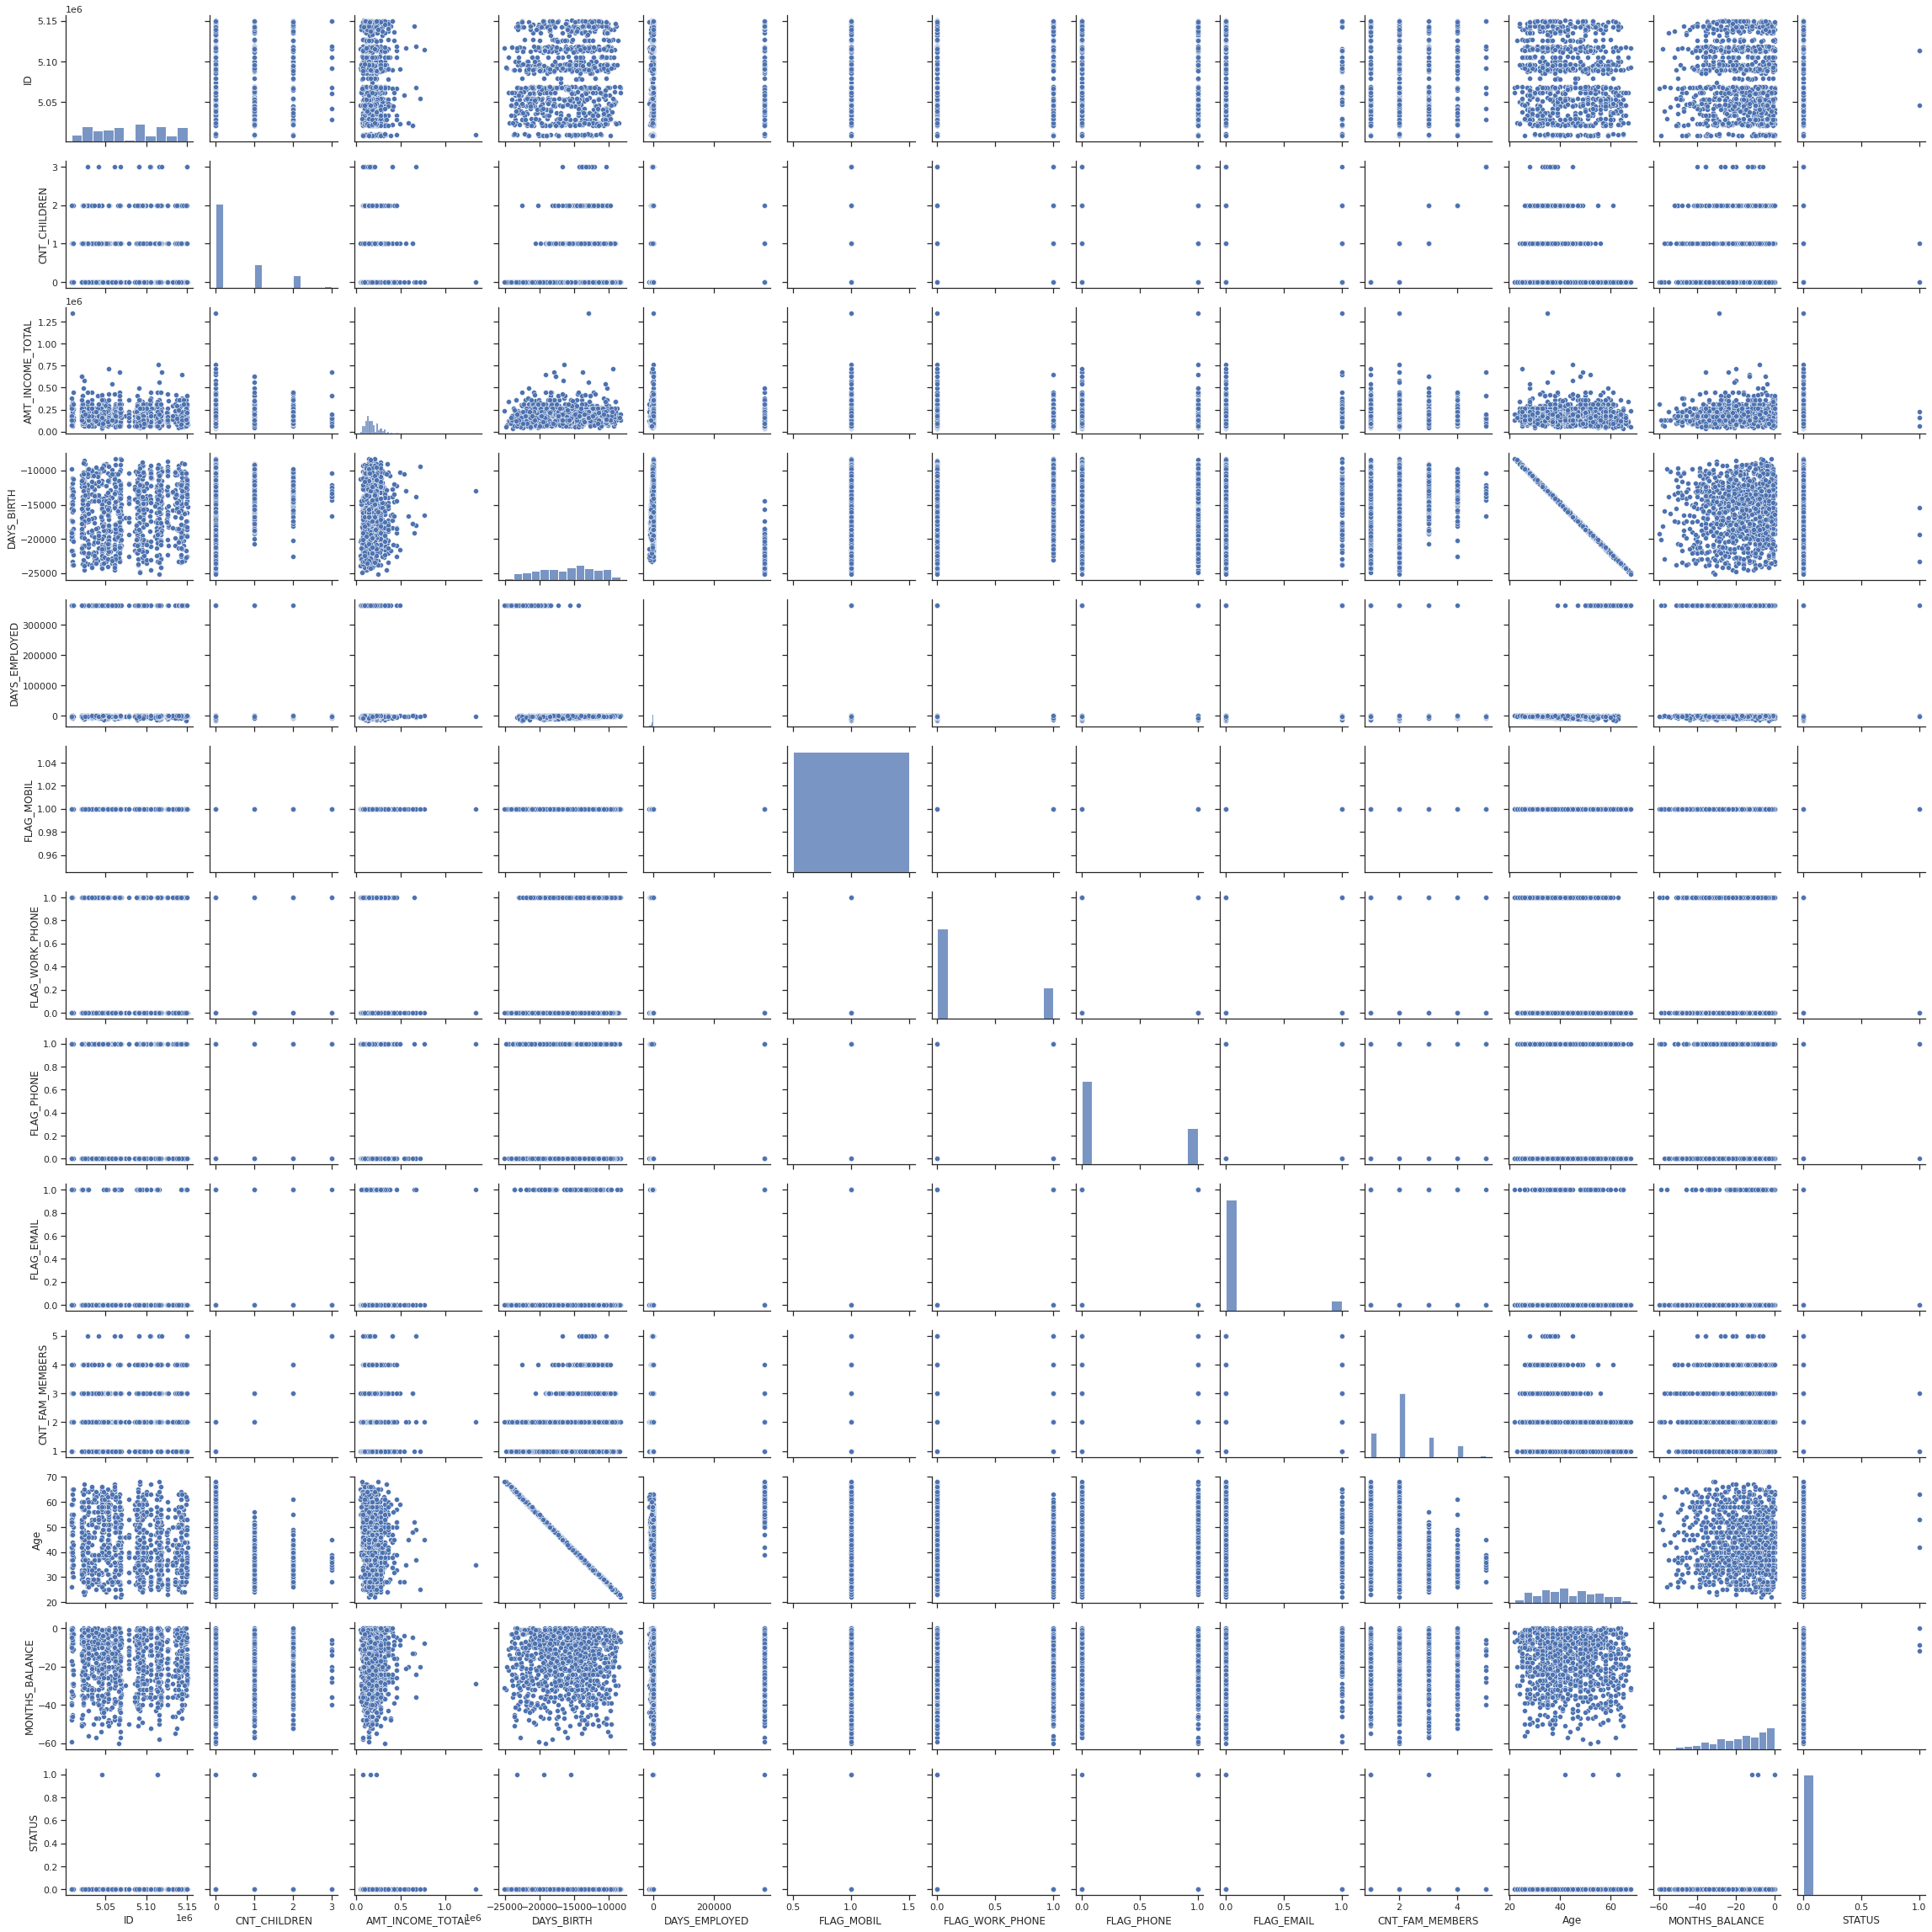

In [ ]:
sns.set_theme(style="ticks")
main_df_plot = main_df.sample( n= 1000)
plot = sns.pairplot(main_df_plot)


## Dimensionality Reduction

### PCA

In [ ]:
PCAdf = main_df
display(PCAdf)
PCAdf = StandardScaler().fit_transform(PCAdf)
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(PCAdf)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9'])
display(principalDf)
print("These are variance ratio.")
print(pca.explained_variance_ratio_)
print("These are eigenvalues.")
print(pca.explained_variance_)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Age,MONTHS_BALANCE,STATUS
0,5008804,0,427500,-12005,-4542,1,1,0,0,2,32,0,0
1,5008804,0,427500,-12005,-4542,1,1,0,0,2,32,-1,0
2,5008804,0,427500,-12005,-4542,1,1,0,0,2,32,-2,0
3,5008804,0,427500,-12005,-4542,1,1,0,0,2,32,-3,0
4,5008804,0,427500,-12005,-4542,1,1,0,0,2,32,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500,-9188,-1193,1,0,0,0,1,25,-9,0
777711,5150337,0,112500,-9188,-1193,1,0,0,0,1,25,-10,1
777712,5150337,0,112500,-9188,-1193,1,0,0,0,1,25,-11,0
777713,5150337,0,112500,-9188,-1193,1,0,0,0,1,25,-12,0


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,1.333079,-1.711569,-0.851697,1.045149,-0.687922,1.078710,0.118772,2.153147,1.504103
1,1.331826,-1.708625,-0.847497,1.055758,-0.652876,1.018444,0.115103,2.148887,1.502170
2,1.330573,-1.705682,-0.843297,1.066367,-0.617829,0.958177,0.111433,2.144627,1.500236
3,1.329320,-1.702738,-0.839097,1.076976,-0.582782,0.897911,0.107764,2.140367,1.498303
4,1.328067,-1.699795,-0.834897,1.087584,-0.547736,0.837645,0.104094,2.136108,1.496369
...,...,...,...,...,...,...,...,...,...
777710,1.052732,-1.466886,-1.077361,-2.548168,-0.070770,0.279353,0.403581,-0.652615,-0.904802
777711,1.002922,-1.580407,-0.321559,-2.516823,13.873534,8.553441,-3.125011,-0.391944,-0.929375
777712,1.050226,-1.460999,-1.068961,-2.526950,-0.000677,0.158821,0.396242,-0.661135,-0.908668
777713,1.048973,-1.458055,-1.064761,-2.516342,0.034370,0.098554,0.392572,-0.665395,-0.910602


These are variance ratio.
[0.25728937 0.12209057 0.10705492 0.09058868 0.08367108 0.08287427
 0.07954028 0.07617596 0.05343098]
These are eigenvalues.
[3.08747639 1.4650887  1.28466075 1.08706558 1.00405421 0.99449256
 0.95448455 0.91411268 0.64117263]


## Discretization

In [ ]:
dis_main_df = main_df.copy()
#df.loc[df["gender"] == "male", "gender"] = 1
dis_main_df.loc[(dis_main_df["Age"] >=1) & (dis_main_df["Age"] < 30),"Age"] = "young"
dis_main_df.loc[(dis_main_df["Age"] >=30) & (dis_main_df["Age"] < 60),"Age"] = "mid"
dis_main_df.loc[(dis_main_df["Age"] >= 60) & (dis_main_df["Age"] < 90),"Age"] = "old"
dis_main_df.loc[(dis_main_df["CNT_FAM_MEMBERS"] >=1) & (dis_main_df["CNT_FAM_MEMBERS"] < 2),"CNT_FAM_MEMBERS"] = "small"
dis_main_df.loc[(dis_main_df["CNT_FAM_MEMBERS"] >=2) & (dis_main_df["CNT_FAM_MEMBERS"] < 5),"CNT_FAM_MEMBERS"] = "regular"
dis_main_df.loc[(dis_main_df["CNT_FAM_MEMBERS"] >=5) & (dis_main_df["CNT_FAM_MEMBERS"] < 10),"CNT_FAM_MEMBERS"] = "medium"
dis_main_df.loc[(dis_main_df["CNT_FAM_MEMBERS"] > 10),"CNT_FAM_MEMBERS"] = "large"
dis_main_df.loc[(dis_main_df["AMT_INCOME_TOTAL"] >=1) & (dis_main_df["AMT_INCOME_TOTAL"] < 30),"Age"] = 1
dis_main_df.loc[(dis_main_df["AMT_INCOME_TOTAL"] >=30) & (dis_main_df["AMT_INCOME_TOTAL"] < 60),"Age"] = 2
dis_main_df.loc[(dis_main_df["AMT_INCOME_TOTAL"] >= 60) & (dis_main_df["AMT_INCOME_TOTAL"] < 90),"Age"] = 3

label = ["A", "B", "C","D","E"]
bin = pd.cut(dis_main_df["AMT_INCOME_TOTAL"],5,labels = label)
for letter in label:
  this_row = bin.index[bin == letter]
  #print(this_row)
  
  meandf= dis_main_df["AMT_INCOME_TOTAL"].iloc[this_row]
  #display(meandf.mean())
  dis_main_df["AMT_INCOME_TOTAL"].iloc[this_row]= meandf.mean()


print(dis_main_df[['Age','CNT_FAM_MEMBERS',"AMT_INCOME_TOTAL"]].max())
#dis_main_df = dis_main_df[['Age','CNT_FAM_MEMBERS',"AMT_INCOME_TOTAL"]]
#display(dis_main_df)

Age                 3.000000e+00
CNT_FAM_MEMBERS     6.000000e+00
AMT_INCOME_TOTAL    1.483929e+06
dtype: float64


### Histogram of Discretized Attribute

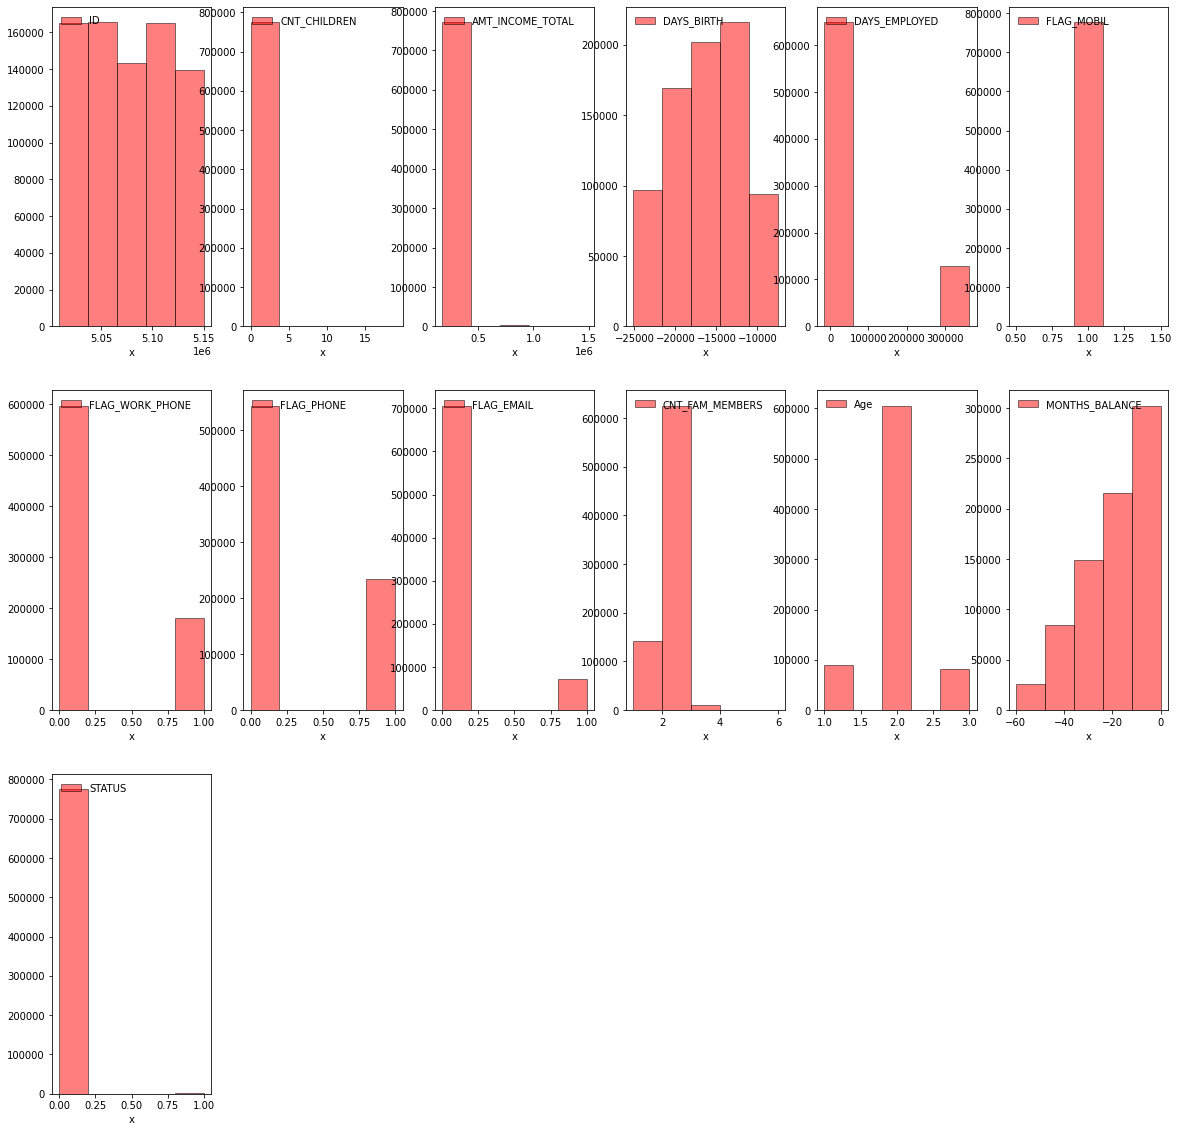

In [ ]:
ncols = 6
nrows = int(np.ceil(len(dis_main_df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(dis_main_df.columns):

            ax.hist(dis_main_df[dis_main_df.columns[counter]], bins=5, color='red', edgecolor='black', alpha=0.5, label='{}'.format(dis_main_df.columns[counter]))
            ax.set_xlabel('x')
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

### X-square Test of Discretized Attributes

### Visual Exploration (scatter-plot matrix) of Discretized Attributes

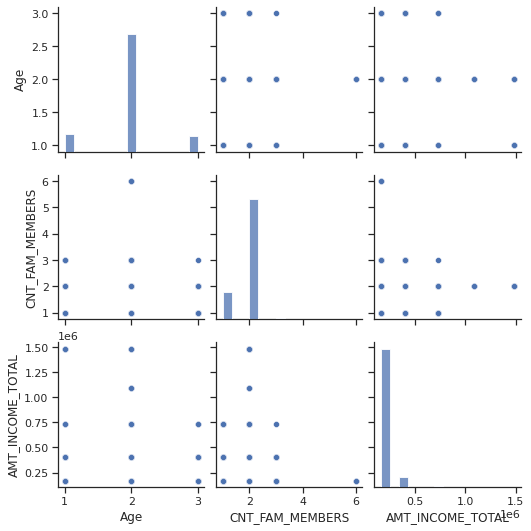

In [ ]:
sns.set_theme(style="ticks")
dis_main_df = dis_main_df[['Age','CNT_FAM_MEMBERS',"AMT_INCOME_TOTAL"]]
dis_main_df = dis_main_df.sample( n= 10000)
sns.pairplot(dis_main_df)

## Feature Selection/Generation

### Select Features

In [ ]:

Cluster_df = main_df[['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
       'FLAG_MOBIL','CNT_FAM_MEMBERS', 'Age','STATUS']].copy()
       
Cluster_df_status1 = Cluster_df.loc[Cluster_df['STATUS'] == 1]
Cluster_df_status0 = Cluster_df.loc[Cluster_df['STATUS'] == 0]
Cluster_df_status1 = Cluster_df_status1.sample( n= 2500,random_state=42)
Cluster_df_status0 = Cluster_df_status0.sample( n= 2500,random_state=42)
twocluster_df_status = [Cluster_df_status1,Cluster_df_status0]
Cluster_df = pd.concat(twocluster_df_status)
Cluster_df = Cluster_df.reset_index(drop = True)
display(Cluster_df)
labels = Cluster_df['STATUS']
Cluster_df = Cluster_df.drop('STATUS',axis =1)

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,Age,STATUS
0,315000,-586,1,2,37,1
1,126000,-863,1,1,39,1
2,112500,365243,1,2,58,1
3,157500,-553,1,2,47,1
4,112500,-1546,1,2,55,1
...,...,...,...,...,...,...
4995,292500,-2590,1,3,35,0
4996,427500,-4542,1,2,32,0
4997,121500,-8161,1,2,51,0
4998,252000,-7404,1,2,50,0


### Generate Features

# Generate Clusters

<center>FOR CMPS 451/551</center>

## K-means

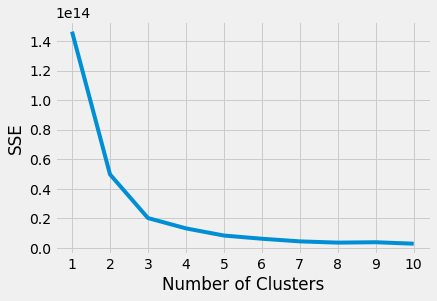

array([[ 1.99855615e+05, -2.44532821e+03,  1.00000000e+00,
         2.31138876e+00,  4.07481980e+01],
       [ 1.41334368e+05,  3.65243000e+05,  1.00000000e+00,
         1.70047733e+00,  6.00357995e+01]])

In [ ]:
rkmeans = KMeans(n_clusters=2, random_state=0).fit(Cluster_df)
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 200,
"random_state": 0,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(Cluster_df)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
rkmeans.cluster_centers_

##hierarchical

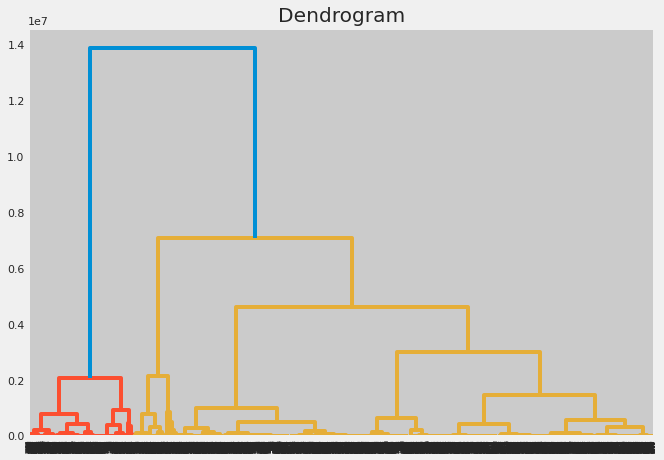

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
cluster = linkage(Cluster_df, 
            method='ward', 
            metric="euclidean")
dn = dendrogram(cluster)
plt.show()

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hier_labels =hierarchical_cluster.fit_predict(Cluster_df)


<center>FOR ISAT 651</center>

## CLARANS

## DBSCAN

## CHAMELEON

## CLIQUE

# Evaluation of Clusters

See instructions provided in the report template

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,Age,True Labels,Kmeans Predicted labels
0,315000,-586,1,2,37,1,0
1,126000,-863,1,1,39,1,0
2,112500,365243,1,2,58,1,1
3,157500,-553,1,2,47,1,0
4,112500,-1546,1,2,55,1,0
...,...,...,...,...,...,...,...
4995,292500,-2590,1,3,35,0,0
4996,427500,-4542,1,2,32,0,0
4997,121500,-8161,1,2,51,0,0
4998,252000,-7404,1,2,50,0,0


Accuracy of Kmeans Predicted labels:
0.5172
Accuracy ofhierarchical Predicted labels
0.5172


,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,Age,True Labels,Kmeans Predicted labels,Hierarchical Predicted labels
0,315000,-586,1,2,37,1,0,0
1,126000,-863,1,1,39,1,0,0
2,112500,365243,1,2,58,1,1,1
3,157500,-553,1,2,47,1,0,0
4,112500,-1546,1,2,55,1,0,0
...,...,...,...,...,...,...,...,...
4995,292500,-2590,1,3,35,0,0,0
4996,427500,-4542,1,2,32,0,0,0
4997,121500,-8161,1,2,51,0,0,0
4998,252000,-7404,1,2,50,0,0,0


[[2124  376]
 [2038  462]]


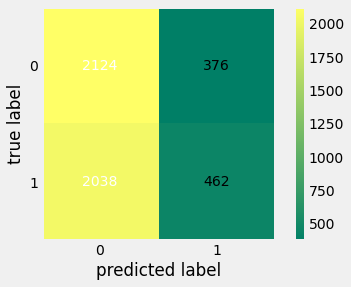

[[2124  376]
 [2038  462]]


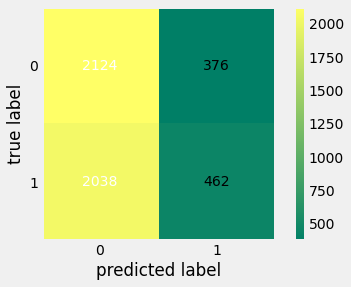

In [ ]:
Cluster_df["True Labels"] = labels
Cluster_df["Kmeans Predicted labels"] = rkmeans.labels_
display(Cluster_df)
Cluster_df["Hierarchical Predicted labels"] =hier_labels
Cluster_df.to_csv("Cluster_df.csv",index= False)
#files.download("Cluster_df.csv")

print("Accuracy of Kmeans Predicted labels:")
accKmean = accuracy_score(Cluster_df["True Labels"],Cluster_df["Kmeans Predicted labels"])
print(accuracy_score(Cluster_df["True Labels"],Cluster_df["Kmeans Predicted labels"]))

print("Accuracy ofhierarchical Predicted labels")
acchier=accuracy_score(Cluster_df["True Labels"],Cluster_df["Hierarchical Predicted labels"])
print(accuracy_score(Cluster_df["True Labels"],Cluster_df["Hierarchical Predicted labels"]))
display(Cluster_df)

tnKmean, fpKmean, fnKmean, tpKmean = confusion_matrix(Cluster_df["True Labels"],Cluster_df["Kmeans Predicted labels"]).ravel()
print(confusion_matrix(Cluster_df["True Labels"],Cluster_df["Kmeans Predicted labels"]))
sensitivityKmean = tnKmean/(tnKmean + fpKmean)
specificityKmean = tpKmean/(tpKmean + fnKmean)
f1Kmean = tpKmean/(tpKmean + .5 *( fpKmean + fnKmean))
kmeanscore = silhouette_score(Cluster_df, rkmeans.labels_, metric='euclidean')
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Cluster_df["True Labels"],Cluster_df["Kmeans Predicted labels"]),cmap='summer',colorbar=True)

plt.show()

tnhier, fphier, fnhier, tphier = confusion_matrix(Cluster_df["True Labels"],Cluster_df["Hierarchical Predicted labels"]).ravel()
print(confusion_matrix(Cluster_df["True Labels"],Cluster_df["Hierarchical Predicted labels"]))
sensitivityhier = tnhier/(tnhier + fphier)
specificityhier = tphier/(tphier + fnhier)
f1hier = tphier/(tphier + .5 *( fphier + fnhier))
hier_score = silhouette_score(Cluster_df, hier_labels, metric='euclidean')
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Cluster_df["True Labels"],Cluster_df["Hierarchical Predicted labels"]),cmap='summer',colorbar=True)
plt.show()

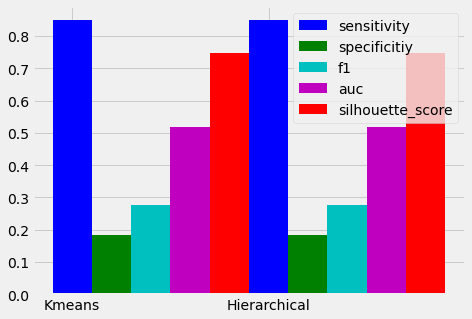

In [ ]:
X = ['Kmeans', 'Hierarchical']
Performance = ["sensitivity","specificitiy","f1",'auc','silhouette_score']
sensitivity = [sensitivityKmean,sensitivityhier]
specificity = [specificityKmean,specificityhier]
score = [kmeanscore,hier_score]
f1 = [f1Kmean,f1hier]
accuracy = [accKmean, acchier ]
X_axis = np.arange(len(X))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X_axis + 0.0, sensitivity,  0.2,color = 'b', label = "sensitivity" )
ax.bar(X_axis + 0.2, specificity,  0.2,color = 'g', label = "specificity" )
ax.bar(X_axis + 0.4, f1,  0.2,color = 'c', label = "f1")
ax.bar(X_axis + 0.6, accuracy, 0.2, color = 'm', label = "accuracy" )
ax.bar(X_axis + 0.8, score, 0.2, color = 'r', label = "silhouette_score" )
plt.xticks(X_axis, X)
plt.legend(Performance)
fig.savefig('plot.png')

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,Age,True Labels,Kmeans Predicted labels,Hierarchical Predicted labels
0,315000,-586,1,2,37,1,0,0
1,126000,-863,1,1,39,1,0,0
2,112500,365243,1,2,58,1,1,1
3,157500,-553,1,2,47,1,0,0
4,112500,-1546,1,2,55,1,0,0
...,...,...,...,...,...,...,...,...
4995,292500,-2590,1,3,35,0,0,0
4996,427500,-4542,1,2,32,0,0,0
4997,121500,-8161,1,2,51,0,0,0
4998,252000,-7404,1,2,50,0,0,0


,principal component 1,principal component 2
0,-1.030913,1.423828
1,-0.447223,0.769211
2,4.094278,0.614936
3,-0.436654,0.806807
4,-0.088996,0.654236
...,...,...
4995,-1.373051,-0.598947
4996,-1.468008,0.087502
4997,-0.342197,-1.113115
4998,-0.574450,-0.568348


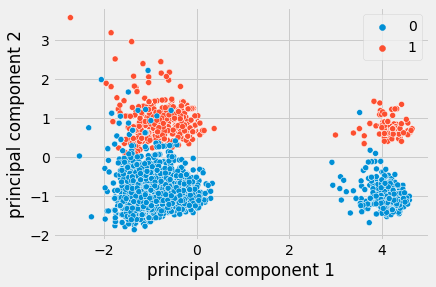

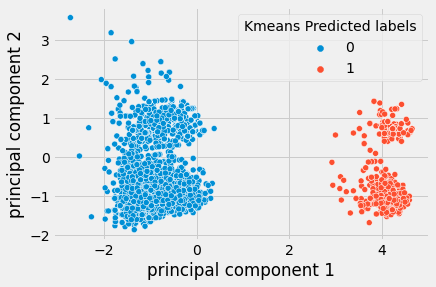

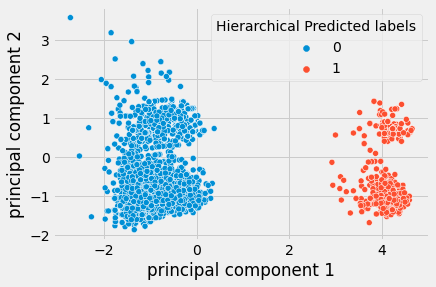

In [ ]:
PCAdf = Cluster_df.copy()

labels = Cluster_df["True Labels"] 
labels = labels.reset_index(drop=True)

Kmean_labels = Cluster_df["Kmeans Predicted labels"]
Kmean_labels = Kmean_labels.reset_index(drop=True)

Heir_labels = Cluster_df["Hierarchical Predicted labels"]
Heir_labels = Heir_labels.reset_index(drop=True)


display(PCAdf)

PCAdf = StandardScaler().fit_transform(PCAdf)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(PCAdf)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
display(principalDf)

sns.scatterplot(data = principalDf, x= principalDf['principal component 1'], y = principalDf['principal component 2'], hue = labels)
plt.legend()
plt.show()

sns.scatterplot(data = principalDf, x= principalDf['principal component 1'], y = principalDf['principal component 2'], hue = Kmean_labels)
plt.show()

sns.scatterplot(data = principalDf, x= principalDf['principal component 1'], y = principalDf['principal component 2'], hue = Heir_labels)

plt.show()




In [ ]:
#Similarity Matrix

from scipy.spatial.distance import pdist,squareform

dist_mtrx = pd.DataFrame(squareform(pdist(Cluster_df, metric='euclidean')))

display(dist_mtrx)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.000000,189000.203000,418135.274384,157500.003775,202502.276343,438683.562459,135021.456702,442951.374468,679.144315,45001.270260,...,441686.662544,135000.871508,135002.676036,407714.186005,207110.188214,22589.068639,112569.533898,193648.214095,63367.856947,225000.365144
1,189000.203000,0.000000,366354.819267,31501.526392,13517.275835,369936.770089,54041.993579,371112.066717,189000.427907,144001.313449,...,370750.392810,54005.377195,54003.040609,366216.607231,19130.198692,166508.956366,301522.445420,8573.852693,126169.666735,36006.462628
2,418135.274384,366354.819267,0.000000,368553.542567,366789.000015,39600.000455,374371.476908,47250.000011,418729.464111,397982.312706,...,45000.000189,371527.238894,372840.099470,22500.000844,372611.174395,409513.267700,485763.262201,373512.445935,397902.044071,366116.033239
3,157500.003775,31501.526392,368553.542567,0.000000,45010.955478,375451.560001,22631.925261,377248.957875,157501.609389,112500.413448,...,376705.075416,22504.547696,22517.325463,366487.330811,49963.256109,135015.367699,270029.465701,36795.131213,94748.014285,67501.025429
4,202502.276343,13517.275835,366789.000015,45010.955478,0.000000,368920.493608,67515.514143,369819.865647,202500.195005,157505.348750,...,369539.132668,67515.470494,67500.093904,367478.462680,7337.040957,180003.028691,315014.248163,11169.522908,139622.942921,22541.367017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,22589.068639,166508.956366,409513.267700,135015.367699,180003.028691,428398.502255,112500.722184,432369.840388,22538.985847,22621.562435,...,431191.508058,112527.530738,112505.918658,400134.185218,184561.160773,0.000000,135014.111537,171090.725342,40785.105394,202514.329476
4996,112569.533898,301522.445420,485763.262201,270029.465701,315014.248163,512330.076466,247504.847302,517654.333849,112547.719173,157558.524469,...,516082.306543,247539.840224,247519.488600,471484.036451,319512.260363,135014.111537,0.000000,306021.400431,175523.335679,337528.174831
4997,193648.214095,8573.852693,373512.445935,36795.131213,11169.522908,376553.458871,58727.837096,377617.014652,193622.841672,148710.677475,...,377288.414000,59052.638637,58885.278508,373647.958940,13524.883142,171090.725342,306021.400431,0.000000,130502.195575,32495.082843
4998,63367.856947,126169.666735,397902.044071,94748.014285,139622.942921,413452.048983,72134.994961,416822.923027,63298.399056,19370.295635,...,415819.716650,72369.429278,72246.919554,390582.624570,144000.013951,40785.105394,175523.335679,130502.195575,0.000000,162160.943957


In [ ]:
#Incidence Matrix

kmean_true = np.array(Kmean_labels)
hier_true = np.array(Heir_labels)

def incidence_mtrx(y):
    return (y == y.reshape(-1, 1)).astype(int)

kmean_incidence = pd.DataFrame(incidence_mtrx(kmean_true))
hier_incidence = pd.DataFrame(incidence_mtrx(hier_true))

print("KMeans Incidence")
display(kmean_incidence)
print("Hierarchical Incidence")
display(hier_incidence)

KMeans Incidence


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
1,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
2,0,0,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
4,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
4996,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
4997,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
4998,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1


Hierarchical Incidence


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
1,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
2,0,0,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
4,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
4996,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
4997,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1
4998,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,1,1,1,1,1


# Messing around

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(PCAdf)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
print("These are variance ratio.")
print(pca.explained_variance_ratio_)
print("These are eigenvalues.")
print(pca.explained_variance_)

These are variance ratio.
[0.52427076 0.1456213  0.13240302]
These are eigenvalues.
[3.67062941 1.01955303 0.92700656]


These are variance ratio.
[0.52427076 0.1456213 ]
These are eigenvalues.
[3.67062941 1.01955303]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  5000 non-null   float64
 1   principal component 2  5000 non-null   float64
 2   True labels            5000 non-null   int64  
 3   Pred labels            5000 non-null   int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 136.8 KB
None


,principal component 1,principal component 2,True labels,Pred labels
0,-1.030913,1.423828,1,2
1,-0.447223,0.769211,1,2
2,4.094278,0.614936,1,1
3,-0.436654,0.806807,1,2
4,-0.088996,0.654236,1,2
...,...,...,...,...
4995,-1.373051,-0.598947,0,0
4996,-1.468008,0.087502,0,2
4997,-0.342197,-1.113115,0,0
4998,-0.574450,-0.568348,0,0


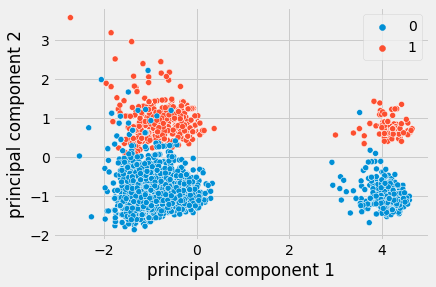

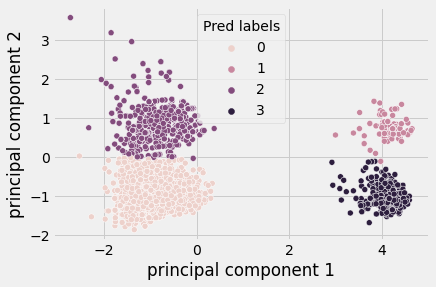

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(PCAdf)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print("These are variance ratio.")
print(pca.explained_variance_ratio_)
print("These are eigenvalues.")
print(pca.explained_variance_)

PCArkmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)

principalDf["True labels"] = labels
principalDf["Pred labels"] = PCArkmeans.labels_

print(principalDf.info()) 

#principalDf.loc[principalDf["Pred labels"] == 2, "Pred labels"] = 1
#principalDf.loc[principalDf["Pred labels"] == 3, "Pred labels"] = 0

Kmean_labels = principalDf["Pred labels"]
display(principalDf)

sns.scatterplot(data = principalDf, x= principalDf['principal component 1'], y = principalDf['principal component 2'], hue = labels)
plt.legend()
plt.show()

sns.scatterplot(data = principalDf, x= principalDf['principal component 1'], y = principalDf['principal component 2'], hue = Kmean_labels)
plt.show()

Accuracy of Kmeans Predicted labels:
0.9836
[[2418   82]
 [   0 2500]]


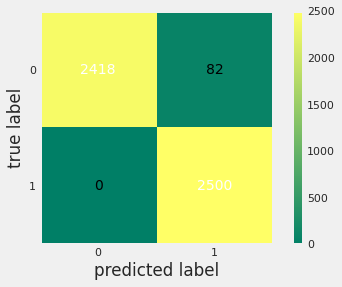

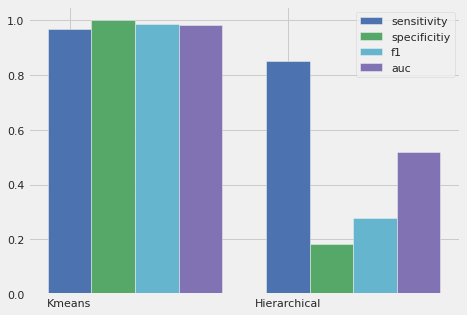

In [ ]:
print("Accuracy of Kmeans Predicted labels:")
accKmean = accuracy_score(principalDf["True labels"],principalDf["Pred labels"])
print(accuracy_score(principalDf["True labels"],principalDf["Pred labels"]))

tnKmean, fpKmean, fnKmean, tpKmean = confusion_matrix(principalDf["True labels"],principalDf["Pred labels"]).ravel()
print(confusion_matrix(principalDf["True labels"],principalDf["Pred labels"]))
sensitivityKmean = tnKmean/(tnKmean + fpKmean)
specificityKmean = tpKmean/(tpKmean + fnKmean)
f1Kmean = tpKmean/(tpKmean + .5 *( fpKmean + fnKmean))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(principalDf["True labels"],principalDf["Pred labels"]),cmap='summer',colorbar=True)
plt.show()

X = ['Kmeans', 'Hierarchical']
Performance = ["sensitivity","specificitiy","f1",'auc','accuracy']
sensitivity = [sensitivityKmean,sensitivityhier]
specificity = [specificityKmean,specificityhier]
f1 = [f1Kmean,f1hier]
accuracy = [accKmean, acchier ]
X_axis = np.arange(len(X))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X_axis + 0.0, sensitivity,  0.2,color = 'b', label = "sensitivity" )
ax.bar(X_axis + 0.2, specificity,  0.2,color = 'g', label = "specificity" )
ax.bar(X_axis + 0.4, f1,  0.2,color = 'c', label = "f1")
ax.bar(X_axis + 0.6, accuracy, 0.2, color = 'm', label = "accuracy" )
plt.xticks(X_axis, X)
plt.legend(Performance)
fig.savefig('plot.png')


# Comparison of Clustering Outcomes

See instructions provided in the report template

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.